# BPS5231 AI For Sustainable Building Design - L2

## 🏗️ Linear Regression

In this exercise, we will:
1. Generate synthetic building-related data (e.g., outdoor temperature vs. energy use).
2. Try different regression lines and see how errors (residuals) change.
3. Visualize the loss function and understand why we want to minimize it.

You will also get to **play with sliders** to see how parameters (`β₀`, `β₁`) affect the fit and the loss.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

# make plots look nice
plt.style.use("seaborn-v0_8-whitegrid")

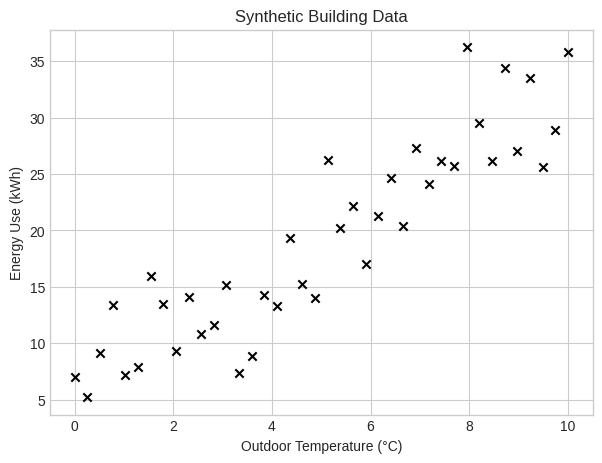

In [ ]:
# Synthetic building-related dataset
np.random.seed(42)
n = 40
X = np.linspace(0, 10, n)
true_slope, true_intercept = 3.0, 5.0
noise = np.random.normal(0, 4, size=n)
y = true_slope * X + true_intercept + noise

# Plot the raw data
plt.figure(figsize=(7,5))
plt.scatter(X, y, color="black", marker="x")
plt.xlabel("Outdoor Temperature (°C)")
plt.ylabel("Energy Use (kWh)")
plt.title("Synthetic Building Data")

plt.show()

In [ ]:
# Helper function
def plot_line(beta0, beta1):
    y_pred = beta0 + beta1 * X
    mse = np.mean((y - y_pred)**2)

    plt.figure(figsize=(7,5))
    plt.scatter(X, y, color="black")
    plt.plot(X, y_pred, color="red", linewidth=2)

    # Residuals
    for xi, yi, ypi in zip(X, y, y_pred):
        plt.plot([xi, xi], [yi, ypi], ":", color="gray")

    plt.title(f"Line: y = {beta1:.2f}x + {beta0:.2f} | MSE = {mse:.2f}")
    plt.xlabel("X (Outdoor Temperature)")
    plt.ylabel("Y (Energy Use)")
    plt.show()

In [ ]:
# Interactive slider
interact(plot_line,
         beta0=FloatSlider(value=0, min=-10, max=20, step=0.5),
         beta1=FloatSlider(value=0, min=-2, max=6, step=0.2));

interactive(children=(FloatSlider(value=0.0, description='beta0', max=20.0, min=-10.0, step=0.5), FloatSlider(…

/tmp/ipython-input-3028871972.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


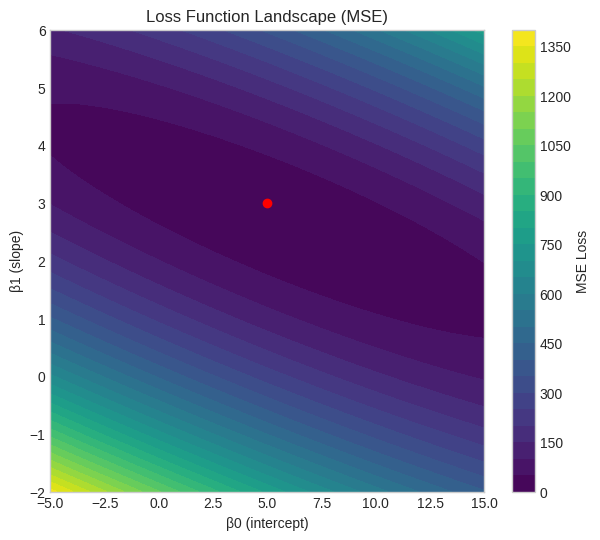

In [ ]:
# Visualize loss function
beta0_vals = np.linspace(-5, 15, 100)
beta1_vals = np.linspace(-2, 6, 100)
B0, B1 = np.meshgrid(beta0_vals, beta1_vals)

Loss = np.zeros_like(B0)
for i in range(len(beta0_vals)):
    for j in range(len(beta1_vals)):
        y_pred = B0[j,i] + B1[j,i]*X
        Loss[j,i] = np.mean((y - y_pred)**2)

plt.figure(figsize=(7,6))
contours = plt.contourf(B0, B1, Loss, levels=30, cmap="viridis")
plt.colorbar(label="MSE Loss")
plt.xlabel("β0 (intercept)")
plt.ylabel("β1 (slope)")
plt.title("Loss Function Landscape (MSE)")
plt.scatter([true_intercept], [true_slope], color="red")
plt.legend()
plt.show()

## 🧪 Gradient Descent (Convex & Interactive)

**Goals**
1. Understand gradient descent (GD) on a simple convex function.
2. Implement one step of GD by filling in a missing line.
3. Explore how **learning rate (α)** and **steps** change the trajectory using sliders.

You will:
- Fill in one line in the GD loop.
- Use sliders to see the path update live.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, IntSlider, fixed

# clean plots
plt.rcParams.update({
    "figure.figsize": (6, 5),
    "axes.grid": True,
    "grid.alpha": 0.25,
    "axes.spines.top": False,
    "axes.spines.right": False,
    "font.size": 12,
})

In [ ]:
# Convex quadratic loss: J(β0, β1) = a*β0^2 + b*β1^2 + c*β0*β1  (elliptic bowl)
a, b, c = 1.0, 3.0, 0.6

def J(beta0, beta1):
    return a*beta0**2 + b*beta1**2 + c*beta0*beta1

def grad(beta0, beta1):
    # ∂J/∂β0 = 2aβ0 + cβ1
    # ∂J/∂β1 = 2bβ1 + cβ0
    dJ_d0 = 2*a*beta0 + c*beta1
    dJ_d1 = 2*b*beta1 + c*beta0
    return np.array([dJ_d0, dJ_d1])


In [ ]:
# 1D non-convex curve to show zig-zag behavior with GD
def f(beta):         # loss
    return np.sin(2*beta) + 0.2*beta**2

def df(beta):        # derivative (numerical for simplicity)
    eps = 1e-5
    return (f(beta+eps) - f(beta-eps)) / (2*eps)

def gd_1d(beta0=3.5, alpha=0.08, steps=30):
    b = beta0
    xs = [b]
    for _ in range(steps):
        b = b - alpha * df(b)
        xs.append(b)
    return np.array(xs)

def plot_1d(alpha=0.08, steps=30, beta0=3.5):
    xs = np.linspace(-4, 4, 600)
    ys = f(xs)
    path = gd_1d(beta0, alpha, steps)
    plt.figure(figsize=(7,4))
    plt.plot(xs, ys, color="black")
    plt.plot(path, f(path), "o-", color="red", linewidth=1)
    plt.xlabel("β")
    plt.ylabel("Loss J(β)")
    plt.title(f"1D GD: α={alpha:.2f}, steps={steps}, start={beta0}")
    plt.show()

interact(
    plot_1d,
    alpha=FloatSlider(value=0.08, min=0.01, max=0.3, step=0.01, description="α (LR)"),
    steps=IntSlider(value=30, min=5, max=80, step=1, description="Steps"),
    beta0=FloatSlider(value=3.5, min=-4, max=4, step=0.1, description="β start"),
);

interactive(children=(FloatSlider(value=0.08, description='α (LR)', max=0.3, min=0.01, step=0.01), IntSlider(v…

In [ ]:
# TODO: Complete one line inside the loop (marked with "👉## FILL ME ##👈")

alpha = 0.12

def gradient_descent(beta0_init=3.5, beta1_init=-3.0, alpha=alpha, steps=20):
    beta = np.array([beta0_init, beta1_init], dtype=float)
    path = [beta.copy()]
    for _ in range(steps):
        g = grad(beta[0], beta[1])       # gradient at current β
        # Update rule: β := β - α * ∇J(β)
        beta = beta - alpha * g
        path.append(beta.copy())
    return np.array(path)

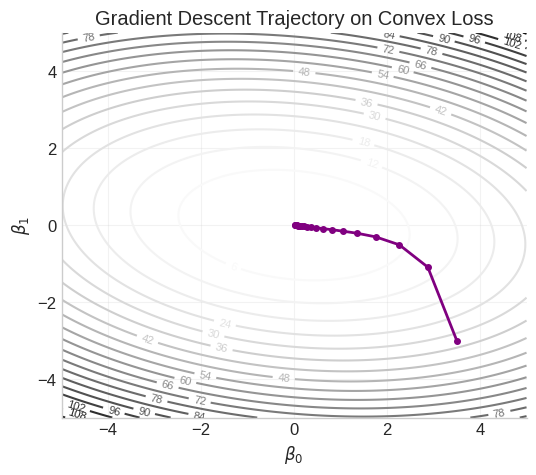

In [ ]:
# Draw loss contours + one example GD path to set the scene
def preview_path(alpha=0.12, steps=20, beta0_init=3.5, beta1_init=-3.0):
    # grid
    x = np.linspace(-5, 5, 250)
    y = np.linspace(-5, 5, 250)
    X, Y = np.meshgrid(x, y)
    Z = a*X**2 + b*Y**2 + c*X*Y

    path = gradient_descent(beta0_init, beta1_init, alpha, steps)

    plt.figure()
    cs = plt.contour(X, Y, Z, levels=20)
    plt.clabel(cs, inline=True, fontsize=8)
    plt.plot(path[:,0], path[:,1], "o-", color="purple", linewidth=2, markersize=4)
    plt.xlabel(r"$\beta_0$")
    plt.ylabel(r"$\beta_1$")
    plt.title("Gradient Descent Trajectory on Convex Loss")
    plt.show()

preview_path()

In [ ]:
def interactive_gd(alpha=0.12, steps=20, beta0_init=3.5, beta1_init=-3.0):
    # grid
    x = np.linspace(-5, 5, 220)
    y = np.linspace(-5, 5, 220)
    X, Y = np.meshgrid(x, y)
    Z = a*X**2 + b*Y**2 + c*X*Y

    path = gradient_descent(beta0_init, beta1_init, alpha, steps)

    plt.figure()
    cs = plt.contour(X, Y, Z, levels=18)
    plt.plot(path[:,0], path[:,1], "o-", color="purple", linewidth=2, markersize=4)
    # draw step arrows for clarity
    for i in range(len(path)-1):
        x0, y0 = path[i]
        x1, y1 = path[i+1]
        plt.arrow(x0, y0, x1-x0, y1-y0, length_includes_head=True,
                  head_width=0.12, head_length=0.18, color="purple", alpha=0.8)
    plt.xlabel(r"$\beta_0$")
    plt.ylabel(r"$\beta_1$")
    plt.title(f"GD: α={alpha:.3f}, steps={steps}, start=({beta0_init:.1f}, {beta1_init:.1f})")
    plt.show()

interact(
    interactive_gd,
    alpha=FloatSlider(value=0.12, min=0.01, max=0.5, step=0.01, description="α (LR)"),
    steps=IntSlider(value=20, min=1, max=80, step=1, description="Steps"),
    beta0_init=FloatSlider(value=3.5, min=-4, max=4, step=0.1, description="β0 start"),
    beta1_init=FloatSlider(value=-3.0, min=-4, max=4, step=0.1, description="β1 start"),
);

interactive(children=(FloatSlider(value=0.12, description='α (LR)', max=0.5, min=0.01, step=0.01), IntSlider(v…

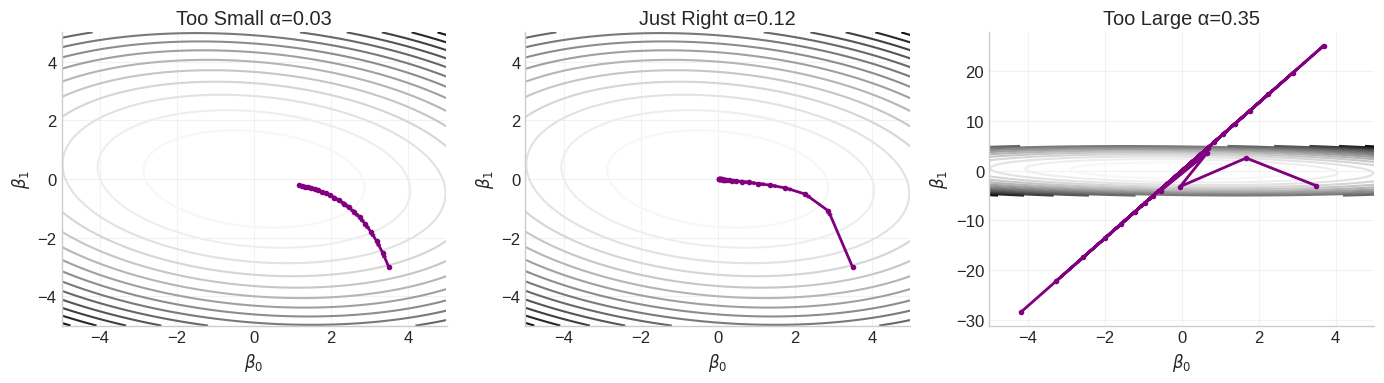

In [ ]:
def compare_lrs(beta0_init=3.5, beta1_init=-3.0, steps=20, alpha_small=0.03, alpha_good=0.12, alpha_big=0.35):
    x = np.linspace(-5, 5, 220)
    y = np.linspace(-5, 5, 220)
    X, Y = np.meshgrid(x, y)
    Z = a*X**2 + b*Y**2 + c*X*Y

    alphas = [alpha_small, alpha_good, alpha_big]
    titles = [f"Too Small α={alpha_small}", f"Just Right α={alpha_good}", f"Too Large α={alpha_big}"]

    fig, axes = plt.subplots(1, 3, figsize=(14,4))
    for ax, lr, ttl in zip(axes, alphas, titles):
        cs = ax.contour(X, Y, Z, levels=16)
        path = gradient_descent(beta0_init, beta1_init, lr, steps)
        ax.plot(path[:,0], path[:,1], "o-", color="purple", linewidth=2, markersize=3)
        for i in range(len(path)-1):
            x0, y0 = path[i]
            x1, y1 = path[i+1]
            ax.arrow(x0, y0, x1-x0, y1-y0, length_includes_head=True,
                     head_width=0.10, head_length=0.15, color="purple", alpha=0.8)
        ax.set_title(ttl)
        ax.set_xlabel(r"$\beta_0$")
        ax.set_ylabel(r"$\beta_1$")
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

    plt.tight_layout()
    plt.show()

compare_lrs()

In [ ]:
# Answer
# beta = beta - alpha * g

## 📈 Polynomial Regression (Interactive)

**Goals**
1. Understand how polynomial degree changes model fit (underfit → good fit → overfit).
2. Implement **one missing line** to build polynomial features.
3. Explore how **polynomial degree** affects the curve and error with sliders.

You’ll:
- Fill in one line to create polynomial features.
- Use a slider to choose the degree and see the curve + MSE update live.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from ipywidgets import interact, IntSlider

# Clean plots
plt.rcParams.update({
    "figure.figsize": (6.5, 5),
    "axes.grid": True,
    "grid.alpha": 0.25,
    "axes.spines.top": False,
    "axes.spines.right": False,
    "font.size": 12,
})

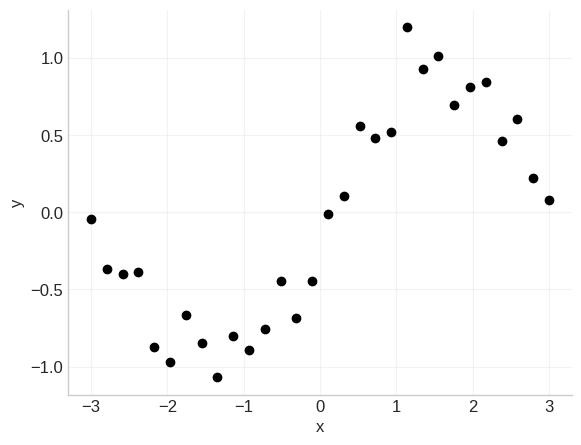

In [ ]:
# Synthetic dataset: sinusoid + noise (good for showing over/underfit)
np.random.seed(42)
X = np.linspace(-3, 3, 30).reshape(-1, 1)
y = np.sin(X) + 0.2 * np.random.randn(30, 1)

# Quick look
plt.scatter(X, y, color="black")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [ ]:
# TODO: Complete ONE LINE to create polynomial features (marked with "👉## FILL ME ##👈")
# Hint: use sklearn.preprocessing.PolynomialFeatures

def fit_poly_and_predict(X, y, degree, X_plot):
    """
    Returns: model, y_plot (predictions on X_plot), train_mse
    """
    # 1) Build polynomial features for training data
    # >>> FILL THIS LINE <<<
    X_poly = 👉## FILL ME ##👈

    # 2) Fit linear regression on polynomial features
    model = LinearRegression().fit(X_poly, y)

    # 3) Predict on plotting grid
    X_plot_poly = PolynomialFeatures(degree=degree, include_bias=True).fit(X).transform(X_plot)
    y_plot = model.predict(X_plot_poly)

    # 4) Training error
    train_mse = mean_squared_error(y, model.predict(X_poly))
    return model, y_plot, train_mse

# Sanity check: if degree=1, curve should be roughly a line and code should run
X_plot = np.linspace(-3, 3, 200).reshape(-1, 1)
_ = fit_poly_and_predict(X, y, degree=1, X_plot=X_plot)
print("✅ Function runs. Try different degrees in the next cell!")

✅ Function runs. Try different degrees in the next cell!


In [ ]:
def show_fit(degree=3):
    model, y_plot, train_mse = fit_poly_and_predict(X, y, degree, X_plot)
    plt.scatter(X, y, color="black", label="Data")
    plt.plot(X_plot, y_plot, color="purple", linewidth=2, label=f"Degree {degree}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"Polynomial Regression (Degree {degree}) — Train MSE: {train_mse:.3f}")
    plt.legend()
    plt.show()

interact(show_fit, degree=IntSlider(value=3, min=1, max=30, step=1, description="Degree"));

interactive(children=(IntSlider(value=3, description='Degree', max=30, min=1), Output()), _dom_classes=('widge…

In [ ]:
# Answer
# X_poly = PolynomialFeatures(degree=degree, include_bias=True).fit_transform(X)

## 🎯 Bias–Variance Trade-off

**Goals**
1. See how model complexity (polynomial degree) affects **bias** and **variance**.
2. Empirically estimate **bias** and **variance** by training many models on resampled noisy data.
3. Compare **Train/Test MSE vs Degree** to identify the sweet spot.

You’ll:
- Fill in one line to compute **bias** and **variance** from predictions.
- Use sliders to change **polynomial degree** and **noise level** and watch the bands change.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from ipywidgets import interact, IntSlider, FloatSlider, fixed

# Clean plots (matplotlib only; one chart per figure)
plt.rcParams.update({
    "figure.figsize": (6.5, 5),
    "axes.grid": True,
    "grid.alpha": 0.25,
    "axes.spines.top": False,
    "axes.spines.right": False,
    "font.size": 12,
})

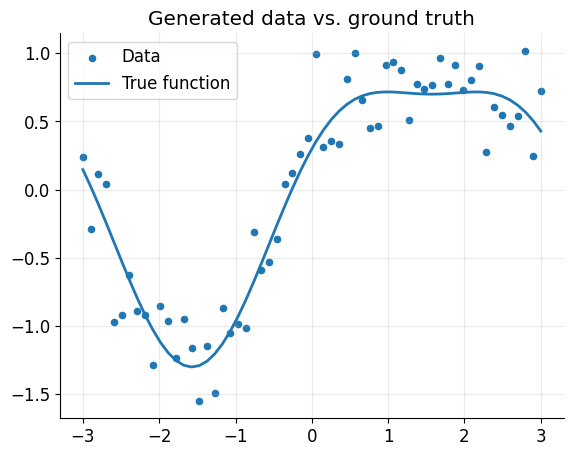

In [ ]:
def make_dataset(n=60, noise=0.3, rng_seed=0):
    """
    Returns X, y for a nonlinear ground-truth function with Gaussian noise.
    """
    rng = np.random.default_rng(rng_seed)
    X = np.linspace(-3, 3, n).reshape(-1, 1)
    # Ground truth: smooth but nonlinear
    y_true = np.sin(X) + 0.3*np.cos(2*X)
    y = y_true + noise * rng.normal(size=y_true.shape)
    return X, y, y_true

# Quick preview
X, y, y_true = make_dataset(n=60, noise=0.3, rng_seed=42)
plt.scatter(X, y, s=20, label="Data")
plt.plot(X, y_true, linewidth=2, label="True function")
plt.title("Generated data vs. ground truth")
plt.legend()
plt.show()

In [ ]:
# TODO: Implement mean squared error manually (marked with "👉## FILL ME ##👈")
def mse(y_true, y_pred):
    # >>> FILL THIS LINE <<<
    return 👉## FILL ME ##👈

# Sanity check
y_test_vals = np.array([0.0, 1.0, 2.0])
y_pred_vals = np.array([0.0, 2.0, 1.0])
print("MSE self-check:", mse(y_test_vals, y_pred_vals))  # expect 2/3 ≈ 0.666...

MSE self-check: 0.6666666666666666


In [ ]:
def fit_poly_predict(X_tr, y_tr, X_te, degree):
    poly = PolynomialFeatures(degree=degree, include_bias=True)
    Xtr_poly = poly.fit_transform(X_tr)
    Xte_poly = poly.transform(X_te)
    model = LinearRegression().fit(Xtr_poly, y_tr)
    return model, poly, Xtr_poly, Xte_poly
def fit_poly_predict(X_tr, y_tr, X_te, degree):
    poly = PolynomialFeatures(degree=degree, include_bias=True)
    Xtr_poly = poly.fit_transform(X_tr)
    Xte_poly = poly.transform(X_te)
    model = LinearRegression().fit(Xtr_poly, y_tr)
    return model, poly, Xtr_poly, Xte_poly

In [ ]:
def explore_single_split(degree=3, noise=0.3, seed=0, test_size=0.3):
    X, y, y_true = make_dataset(noise=noise, rng_seed=seed)
    X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=test_size, random_state=seed)

    model, poly, Xtr_poly, Xte_poly = fit_poly_predict(X_tr, y_tr, X_te, degree)

    # Predictions for plotting curve
    X_plot = np.linspace(-3, 3, 400).reshape(-1, 1)
    y_plot = model.predict(poly.transform(X_plot))

    # Train/Test predictions
    y_tr_pred = model.predict(Xtr_poly)
    y_te_pred = model.predict(Xte_poly)

    tr_mse = mse(y_tr, y_tr_pred)
    te_mse = mse(y_te, y_te_pred)

    # Plot train fit
    plt.figure()
    plt.scatter(X_tr, y_tr, s=20, label="Train")
    plt.plot(X_plot, y_plot, linewidth=2, label=f"Degree {degree}")
    plt.title(f"Train fit — MSE: {tr_mse:.3f}")
    plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()

    # Plot test fit
    plt.figure()
    plt.scatter(X_te, y_te, s=20, label="Test")
    plt.plot(X_plot, y_plot, linewidth=2, label=f"Degree {degree}")
    plt.title(f"Test generalization — MSE: {te_mse:.3f}")
    plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()

interact(
    explore_single_split,
    degree=IntSlider(value=3, min=1, max=25, step=1, description="Degree"),
    noise=FloatSlider(value=0.3, min=0.0, max=0.8, step=0.05, description="Noise σ"),
    seed=IntSlider(value=0, min=0, max=99, step=1, description="Seed"),
    test_size=fixed(0.3),
);
def explore_single_split(degree=3, noise=0.3, seed=0, test_size=0.3):
    X, y, y_true = make_dataset(noise=noise, rng_seed=seed)
    X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=test_size, random_state=seed)

    model, poly, Xtr_poly, Xte_poly = fit_poly_predict(X_tr, y_tr, X_te, degree)

    # Predictions for plotting curve
    X_plot = np.linspace(-3, 3, 400).reshape(-1, 1)
    y_plot = model.predict(poly.transform(X_plot))

    # Train/Test predictions
    y_tr_pred = model.predict(Xtr_poly)
    y_te_pred = model.predict(Xte_poly)

    tr_mse = mse(y_tr, y_tr_pred)
    te_mse = mse(y_te, y_te_pred)

    # Plot train fit
    plt.figure()
    plt.scatter(X_tr, y_tr, s=20, label="Train")
    plt.plot(X_plot, y_plot, linewidth=2, label=f"Degree {degree}")
    plt.title(f"Train fit — MSE: {tr_mse:.3f}")
    plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()

    # Plot test fit
    plt.figure()
    plt.scatter(X_te, y_te, s=20, label="Test")
    plt.plot(X_plot, y_plot, linewidth=2, label=f"Degree {degree}")
    plt.title(f"Test generalization — MSE: {te_mse:.3f}")
    plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()

interact(
    explore_single_split,
    degree=IntSlider(value=3, min=1, max=25, step=1, description="Degree"),
    noise=FloatSlider(value=0.3, min=0.0, max=0.8, step=0.05, description="Noise σ"),
    seed=IntSlider(value=0, min=0, max=99, step=1, description="Seed"),
    test_size=fixed(0.3),
);

interactive(children=(IntSlider(value=3, description='Degree', max=25, min=1), FloatSlider(value=0.3, descript…

interactive(children=(IntSlider(value=3, description='Degree', max=25, min=1), FloatSlider(value=0.3, descript…

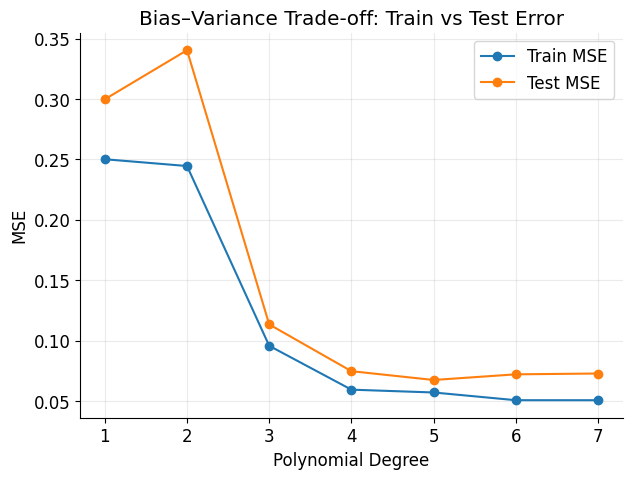

In [ ]:
def sweep_degrees(max_degree=7, noise=0.3, seed=0):
    X, y, _ = make_dataset(noise=noise, rng_seed=seed)
    X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.3, random_state=seed)

    degrees = np.arange(1, max_degree+1)
    train_mse, test_mse = [], []

    for d in degrees:
        model, poly, Xtr_poly, Xte_poly = fit_poly_predict(X_tr, y_tr, X_te, d)
        train_mse.append(mse(y_tr, model.predict(Xtr_poly)))
        test_mse.append(mse(y_te, model.predict(Xte_poly)))

    plt.figure(figsize=(7,5))
    plt.plot(degrees, train_mse, marker="o", label="Train MSE")
    plt.plot(degrees, test_mse, marker="o", label="Test MSE")
    plt.xlabel("Polynomial Degree"); plt.ylabel("MSE")
    plt.title("Bias–Variance Trade‑off: Train vs Test Error")
    plt.legend(); plt.show()

sweep_degrees(max_degree=7, noise=0.3, seed=42)

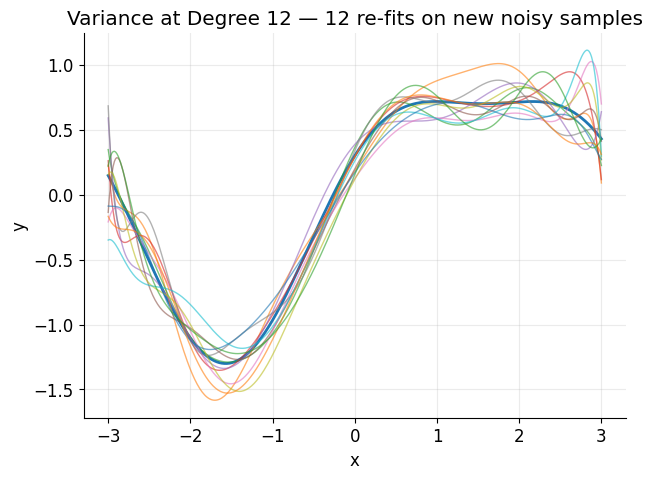

In [ ]:
def overlay_many_fits(degree=12, noise=0.3, n_resamples=12):
    X_base = np.linspace(-3, 3, 60).reshape(-1, 1)
    X_plot = np.linspace(-3, 3, 400).reshape(-1, 1)

    plt.figure(figsize=(7,5))
    # True function (noiseless) for reference
    y_true = np.sin(X_plot) + 0.3*np.cos(2*X_plot)
    plt.plot(X_plot, y_true, linewidth=2, label="True function")

    # Re-sample noisy datasets and fit repeatedly
    for s in range(n_resamples):
        X, y, _ = make_dataset(n=60, noise=noise, rng_seed=s)
        model, poly, _, _ = fit_poly_predict(X, y, X_plot, degree)
        y_plot = model.predict(poly.transform(X_plot))
        plt.plot(X_plot, y_plot, linewidth=1, alpha=0.6)

    plt.title(f"Variance at Degree {degree} — {n_resamples} re‑fits on new noisy samples")
    plt.xlabel("x"); plt.ylabel("y")
    plt.show()

overlay_many_fits(degree=12, noise=0.3, n_resamples=12)

In [ ]:
# Answer
# np.mean((y_true - y_pred)**2)

## 🔍 KNN Regression

**Goals**
1. Understand how K-Nearest Neighbors (KNN) regression works.
2. See how different values of **K** change the model fit.
3. Explore the **bias–variance trade-off** with K.

You’ll:
- Fill in one missing line (fitting KNN).
- Use sliders to play with **K** and see how the curve changes.

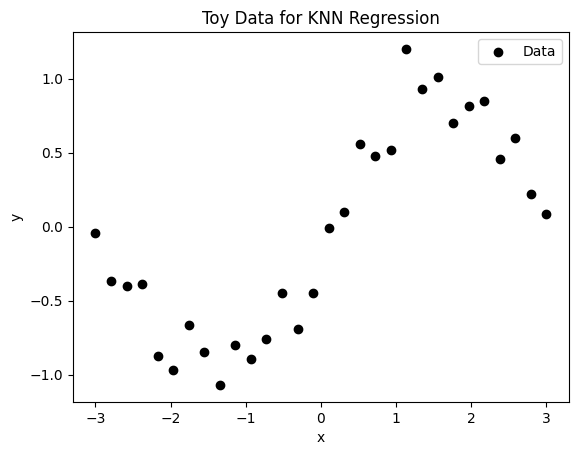

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from ipywidgets import interact, IntSlider

# Generate toy data
np.random.seed(42)
X = np.linspace(-3, 3, 30).reshape(-1, 1)
y = np.sin(X) + 0.2 * np.random.randn(30, 1)

# Dense grid for plotting predictions
X_plot = np.linspace(-3, 3, 200).reshape(-1, 1)

plt.scatter(X, y, c="black", label="Data")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Toy Data for KNN Regression")
plt.show()

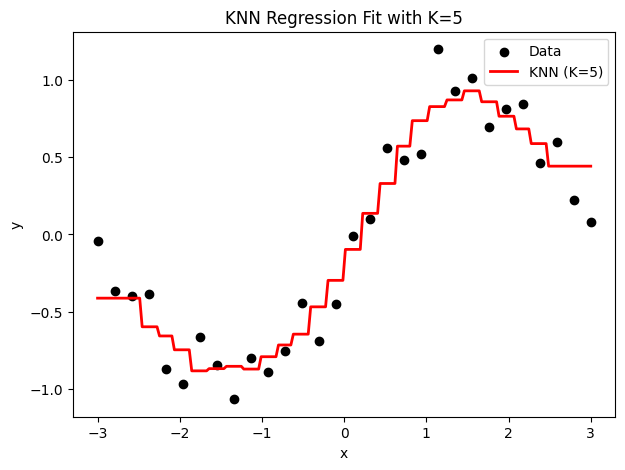

In [ ]:
def knn_regression(K=5):
    # Step 1: Define model
    model = KNeighborsRegressor(n_neighbors=K)

    # Step 2: Train model (👉## FILL ME ##👈)
    # model.fit(???) 👉## FILL ME ##👈

    # Step 3: Predict on dense grid
    y_pred = model.predict(X_plot)

    # Plot results
    plt.figure(figsize=(7,5))
    plt.scatter(X, y, c="black", label="Data")
    plt.plot(X_plot, y_pred, color="red", lw=2, label=f"KNN (K={K})")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"KNN Regression Fit with K={K}")
    plt.legend()
    plt.show()

# Try with K=5
knn_regression(K=5)

In [ ]:
interact(
    knn_regression,
    K=IntSlider(value=5, min=1, max=30, step=1, description="K")
);

interactive(children=(IntSlider(value=5, description='K', max=30, min=1), Output()), _dom_classes=('widget-int…

In [ ]:
# Answer
# model.fit(X, y.ravel())

## 🌐 Design Space Exploration (Façade Shading)

**Goals**
1. Explore a simple *design space* with two variables (fin **angle** and **spacing**).
2. See how changing parameters creates **families of designs** (not just one).
3. Generate a **grid of variations** (3×3) and choose a preferred option.

You’ll:
- Use sliders to adjust **Angle (°)** and **Spacing (m)** and visualize the façade.
- Auto-generate a **design space grid** and reflect on trade-offs.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, fixed

# Plot style
plt.rcParams.update({
    "figure.figsize": (6, 6),
    "axes.grid": False,
    "axes.spines.top": False,
    "axes.spines.right": False,
    "axes.spines.left": False,
    "axes.spines.bottom": False,
    "font.size": 12,
})


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, fixed

# Plot style
plt.rcParams.update({
    "figure.figsize": (6, 6),
    "axes.grid": False,
    "axes.spines.top": False,
    "axes.spines.right": False,
    "axes.spines.left": False,
    "axes.spines.bottom": False,
    "font.size": 12,
})

In [ ]:
def draw_facade_with_louvers(ax, width=12.0, height=8.0,
                             louver_angle_deg=30.0, louver_spacing=1.2,
                             louver_depth=0.8, louver_thickness=0.12,
                             rows=6, cols=10, show_panels=True):
    """
    Draw a simple façade with HORIZONTAL louvers (left->right).
    - louver_angle_deg: tilt of louvers (−80° to 80°)
    - louver_spacing: center-to-center spacing between louvers
    - louver_depth: projection depth (controls how much tilt offset is visible)
    - louver_thickness: line width for louvers
    - rows, cols: optional panel grid for context
    """

    # Background shade as a rough proxy of "density" (smaller spacing -> darker)
    shade = np.clip(0.2 + 0.8 * (louver_spacing / 2.0), 0.2, 1.0)
    face_color = str(shade)  # grayscale

    ax.clear()
    ax.set_aspect("equal")
    ax.set_xlim(0, width)
    ax.set_ylim(0, height)
    ax.axis("off")

    # Façade background
    ax.add_patch(plt.Rectangle((0, 0), width, height,
                               facecolor=face_color, edgecolor="black", linewidth=1.0))

    # Optional panel grid (light)
    if show_panels:
        for r in np.linspace(0, height, rows+1):
            ax.plot([0, width], [r, r], color="#dddddd", linewidth=0.8)
        for c in np.linspace(0, width, cols+1):
            ax.plot([c, c], [0, height], color="#dddddd", linewidth=0.8)

    # Louver geometry
    angle = np.deg2rad(louver_angle_deg)
    y_offset = louver_depth * np.sin(angle)   # vertical shift to create tilt
    y_positions = np.arange(louver_spacing/2, height, louver_spacing)

    # Draw horizontal louvers (slightly tilted by angle)
    for y0 in y_positions:
        y1 = np.clip(y0 - y_offset, 0, height)
        y2 = np.clip(y0 + y_offset, 0, height)
        ax.plot([0, width], [y1, y2], color="black", linewidth=max(louver_thickness, 0.1))

    # Annotation
    ax.text(0.02*width, 0.96*height,
            f"Angle = {louver_angle_deg:.0f}°\nSpacing = {louver_spacing:.2f} m",
            va="top", ha="left", fontsize=11)

In [ ]:
def interactive_facade_louvers(angle=10.0, spacing=1.2, depth=0.8, thickness=0.12, show_panels=True):
    fig, ax = plt.subplots(figsize=(6, 6))
    draw_facade_with_louvers(ax,
                             louver_angle_deg=angle,
                             louver_spacing=spacing,
                             louver_depth=depth,
                             louver_thickness=thickness,
                             rows=6, cols=10,
                             show_panels=show_panels)
    plt.show()

interact(
    interactive_facade_louvers,
    angle=FloatSlider(value=10.0, min=-80.0, max=80.0, step=2.0, description="Angle (°)"),
    spacing=FloatSlider(value=1.2, min=0.4, max=2.0, step=0.1, description="Spacing (m)"),
    depth=FloatSlider(value=0.8, min=0.2, max=1.5, step=0.1, description="Depth"),
    thickness=FloatSlider(value=0.12, min=0.05, max=0.4, step=0.01, description="Line width"),
    show_panels=fixed(True),
);

interactive(children=(FloatSlider(value=10.0, description='Angle (°)', max=80.0, min=-80.0, step=2.0), FloatSl…

Saved grid to: louver_design_space_grid.png


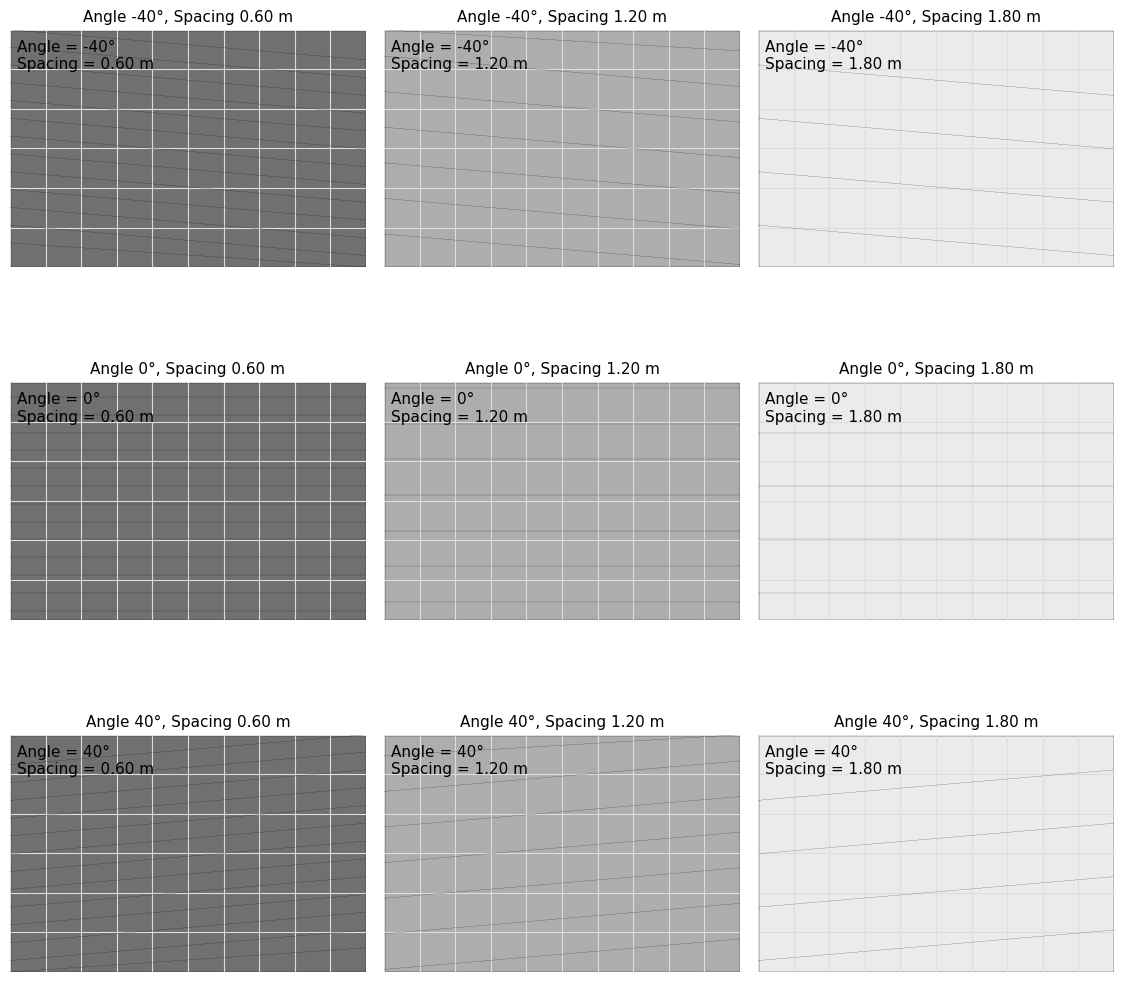

In [ ]:
def grid_designs_louvers(angles, spacings, depth=0.8, thickness=0.12, show_panels=True, save_path=None):
    """
    Generate a grid of designs (len(angles) x len(spacings)).
    Rows vary by angle, columns vary by spacing.
    """
    R, C = len(angles), len(spacings)
    fig, axes = plt.subplots(R, C, figsize=(3.8*C, 3.8*R))
    if R == 1 and C == 1:
        axes = np.array([[axes]])
    elif R == 1 or C == 1:
        axes = np.atleast_2d(axes)

    for i, ang in enumerate(angles):
        for j, sp in enumerate(spacings):
            ax = axes[i, j]
            draw_facade_with_louvers(ax,
                                     louver_angle_deg=ang,
                                     louver_spacing=sp,
                                     louver_depth=depth,
                                     louver_thickness=thickness,
                                     rows=6, cols=10, show_panels=show_panels)
            ax.set_title(f"Angle {ang:.0f}°, Spacing {sp:.2f} m", fontsize=11)

    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, dpi=200, bbox_inches="tight")
        print(f"Saved grid to: {save_path}")
    plt.show()

# Example 3×3 grid (edit these lists to explore):
angles_example = [-40, 0, 40]
spacings_example = [0.6, 1.2, 1.8]
grid_designs_louvers(angles_example, spacings_example, depth=0.8, thickness=0.12, save_path="louver_design_space_grid.png")

In [ ]:
def draw_sun_rays(ax, width=12.0, height=8.0, azimuth_from_left=True, altitude_deg=55.0, n_rays=8):
    """
    Simple visual overlay: angled yellow rays entering the façade rectangle.
    altitude_deg ~ solar altitude angle.
    azimuth_from_left: True = rays come from left; False = from right.
    """
    alt = np.deg2rad(altitude_deg)
    # Direction vector (projected): steeper altitude -> steeper downward slope
    dx = np.cos(alt)
    dy = -np.sin(alt)  # downward

    # Starting x for rays (left or right edge)
    x0 = 0.0 if azimuth_from_left else width
    x_spacing = width / (n_rays + 1)

    for k in range(1, n_rays + 1):
        sx = k * x_spacing if azimuth_from_left else width - k * x_spacing
        sy = height + 1.0  # start slightly above
        # draw segment long enough to cross façade
        length = max(width, height) * 1.6
        ex = sx + (dx * length if azimuth_from_left else -dx * length)
        ey = sy + dy * length
        ax.plot([sx, ex], [sy, ey], color="#f1c40f", linewidth=2, alpha=0.9)

# Example usage overlaying current figure:
# fig, ax = plt.subplots(figsize=(6,6))
# draw_facade_with_louvers(ax, louver_angle_deg=10, louver_spacing=1.0)
# draw_sun_rays(ax, altitude_deg=60, azimuth_from_left=False, n_rays=9)
# plt.show()

📝 Task — Pick & Defend
1. Generate a **3×3 grid** (Cell 5) using your own parameter ranges:
   - Choose **3 angles** and **3 spacings** that make sense for your chosen façade.
2. **Pick one favorite** design from the grid.
3. In 2–3 sentences, explain your choice:
   - Aesthetics (rhythm, density, orientation)
   - Performance intuition (sun shading, glare, daylight)
   - Buildability (spacing/angle practicality)

## 🏙️ Beyond Linearity: Edge Detection in the Built Environment

**Goals**
1. Learn how computer vision detects "straight lines" using **Sobel** filters.
2. Apply Sobel and Canny edges to a campus photo you take.
3. Reflect on where straight-line assumptions fail in real-world spaces.

**Path / Outputs**
- Images will be saved to: `/edges_out/`
- You can change the folder in the next cell by editing `OUTPUT_DIR`.

**What to do**
1. Go outside, take a photo of a building/space on campus (façade, walkway, courtyard).
2. Upload it to this notebook.
3. Run the edge detectors, compare results, and reflect.


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

# Where to save figures
OUTPUT_DIR = "/edges_out"
os.makedirs(OUTPUT_DIR, exist_ok=True)

plt.rcParams.update({
    "figure.figsize": (6, 6),
    "axes.grid": False,
    "axes.spines.top": False,
    "axes.spines.right": False,
})
print("Saving outputs to:", OUTPUT_DIR)

Saving outputs to: /edges_out


Saving NUS-SDE4-project-image4.jpg to NUS-SDE4-project-image4.jpg
Using: NUS-SDE4-project-image4.jpg


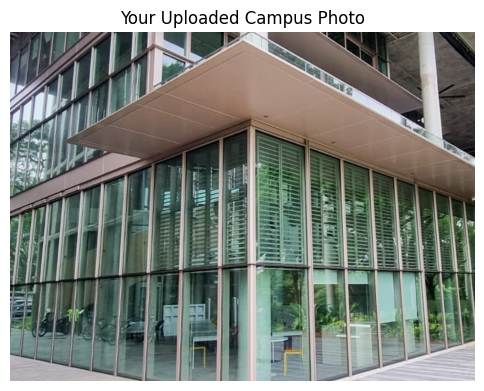

In [ ]:
from google.colab import files

uploaded = files.upload()
assert len(uploaded) > 0, "Please upload at least one image."
fname = list(uploaded.keys())[0]
print("Using:", fname)

# Read both RGB (for display) and grayscale (for processing)
img_bgr = cv2.imread(fname, cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(6,6))
plt.imshow(img_rgb)
plt.axis("off")
plt.title("Your Uploaded Campus Photo")
plt.show()

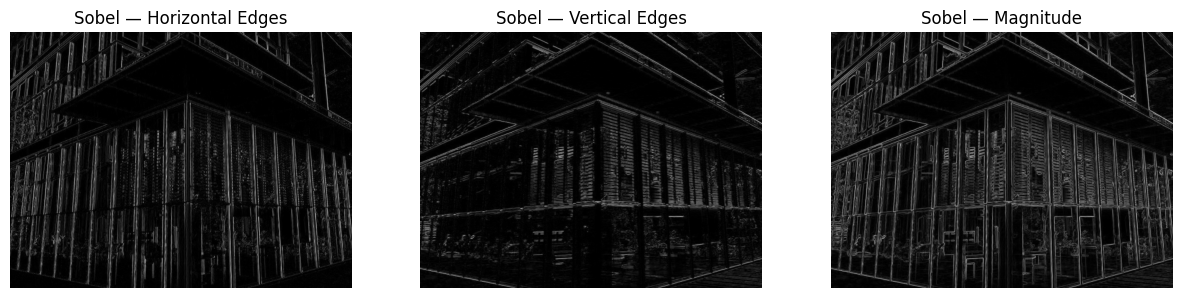

Saved Sobel outputs to: /edges_out


In [ ]:
# Sobel edges
sobelx = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=3)   # horizontal changes
sobely = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=3)   # vertical changes
sobel_mag = np.sqrt(sobelx**2 + sobely**2)

# Normalize for display
def norm_01(a):
    a = a.astype(np.float64)
    a = a - a.min()
    if a.max() > 0:
        a = a / a.max()
    return a

sx = norm_01(np.abs(sobelx))
sy = norm_01(np.abs(sobely))
sm = norm_01(sobel_mag)

fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(sx, cmap="gray"); axes[0].set_title("Sobel — Horizontal Edges"); axes[0].axis("off")
axes[1].imshow(sy, cmap="gray"); axes[1].set_title("Sobel — Vertical Edges"); axes[1].axis("off")
axes[2].imshow(sm, cmap="gray"); axes[2].set_title("Sobel — Magnitude"); axes[2].axis("off")
plt.show()

# Save
cv2.imwrite(os.path.join(OUTPUT_DIR, "sobel_x.png"), (sx*255).astype(np.uint8))
cv2.imwrite(os.path.join(OUTPUT_DIR, "sobel_y.png"), (sy*255).astype(np.uint8))
cv2.imwrite(os.path.join(OUTPUT_DIR, "sobel_mag.png"), (sm*255).astype(np.uint8))
print("Saved Sobel outputs to:", OUTPUT_DIR)

In [ ]:
from ipywidgets import interact, IntSlider, fixed

def show_canny(low_thresh=60, high_thresh=160, aperture=3, blur_ksize=3):
    # Optional slight blur helps reduce noise before Canny
    k = max(1, int(blur_ksize))
    if k % 2 == 0: k += 1  # must be odd for GaussianBlur
    blurred = cv2.GaussianBlur(img_gray, (k, k), 0)

    # Canny (apertureSize must be 3, 5, or 7)
    aperture = int(aperture)
    if aperture not in [3, 5, 7]:
        aperture = 3

    edges = cv2.Canny(blurred, threshold1=low_thresh, threshold2=high_thresh, apertureSize=aperture, L2gradient=True)

    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.imshow(blurred, cmap="gray"); plt.axis("off"); plt.title("Blurred Input")
    plt.subplot(1,2,2)
    plt.imshow(edges, cmap="gray"); plt.axis("off"); plt.title(f"Canny: low={low_thresh}, high={high_thresh}, ap={aperture}")
    plt.show()

    # Save last run
    cv2.imwrite(os.path.join(OUTPUT_DIR, "canny_edges.png"), edges)

interact(
    show_canny,
    low_thresh=IntSlider(30, 0, 200, 5, description="Low"),
    high_thresh=IntSlider(120, 10, 300, 5, description="High"),
    aperture=IntSlider(3, 3, 7, 2, description="Aperture"),
    blur_ksize=IntSlider(3, 1, 11, 2, description="Blur k")
);

interactive(children=(IntSlider(value=30, description='Low', max=200, step=5), IntSlider(value=120, descriptio…

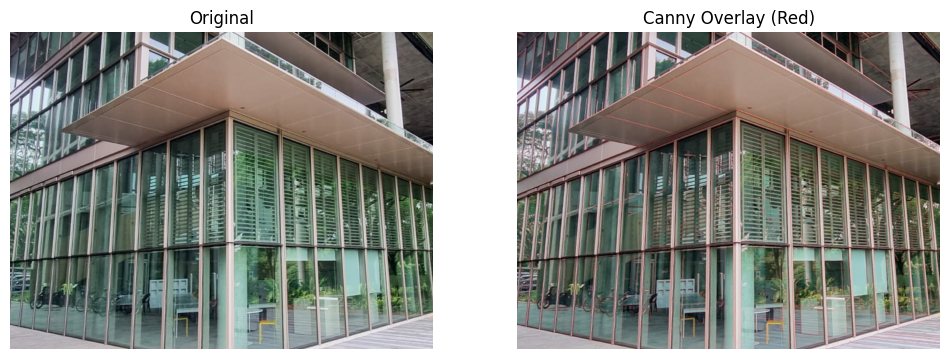

Saved overlay to: /edges_out/canny_overlay.png


In [ ]:
# Overlay Canny edges in red on the original RGB image
edges = cv2.imread(os.path.join(OUTPUT_DIR, "canny_edges.png"), cv2.IMREAD_GRAYSCALE)
overlay = img_rgb.copy()
overlay[edges > 0] = [255, 60, 60]  # color edges red

blend = (0.6 * img_rgb + 0.4 * overlay).astype(np.uint8)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1); plt.imshow(img_rgb); plt.axis("off"); plt.title("Original")
plt.subplot(1,2,2); plt.imshow(blend); plt.axis("off"); plt.title("Canny Overlay (Red)")
plt.show()

Image.fromarray(blend).save(os.path.join(OUTPUT_DIR, "canny_overlay.png"))
print("Saved overlay to:", os.path.join(OUTPUT_DIR, "canny_overlay.png"))

In [ ]:
# 📐 Beyond Activity: Custom Edge Detection Kernels
# Upload your own photo or provide a valid path.

import cv2
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
from google.colab import files

# 🔹 Upload a file (students will select their image)
uploaded = files.upload()

# 🔹 Automatically take the first uploaded file
path = list(uploaded.keys())[0]
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

def custom_kernel(k11, k12, k13, k21, k22, k23, k31, k32, k33):
    kernel = np.array([
        [k11, k12, k13],
        [k21, k22, k23],
        [k31, k32, k33]
    ])
    filtered = cv2.filter2D(img, -1, kernel)

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(img, cmap="gray")
    axes[0].set_title("Original")
    axes[0].axis("off")

    axes[1].imshow(filtered, cmap="gray")
    axes[1].set_title("Filtered with Custom Kernel")
    axes[1].axis("off")

    plt.show()

# Interactive sliders for kernel coefficients
interact(
    custom_kernel,
    k11=FloatSlider(value=-1, min=-3, max=3, step=0.5),
    k12=FloatSlider(value=0,  min=-3, max=3, step=0.5),
    k13=FloatSlider(value=1,  min=-3, max=3, step=0.5),
    k21=FloatSlider(value=-2, min=-3, max=3, step=0.5),
    k22=FloatSlider(value=0,  min=-3, max=3, step=0.5),
    k23=FloatSlider(value=2,  min=-3, max=3, step=0.5),
    k31=FloatSlider(value=-1, min=-3, max=3, step=0.5),
    k32=FloatSlider(value=0,  min=-3, max=3, step=0.5),
    k33=FloatSlider(value=1,  min=-3, max=3, step=0.5),
);

Saving NUS-SDE4-project-image4.jpg to NUS-SDE4-project-image4 (1).jpg


interactive(children=(FloatSlider(value=-1.0, description='k11', max=3.0, min=-3.0, step=0.5), FloatSlider(val…